In [1]:
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')
get_ipython().magic('matplotlib inline')

In [2]:
import sys
import os

import itertools
import pathlib

import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.optimize import curve_fit


import matplotlib.pyplot as plt
import matplotlib as mpl
#from mpltools import style
import matplotlib.gridspec as gridspec
#from mpltools import layout
#from networkx import Graph
#import seaborn as sns

sys.path.append('..')
import about
import pathcustomize

from waldo.conf import settings
from waldo.wio.experiment import Experiment
from waldo.extern import multiworm 
#from multiworm.core import MWTSummaryError
#from waldo.output.speed import SpeedWriter
#from waldo.output.speed import *
#from waldo.wio.worm_writer import WormWriter
import obsevation_functions as of

plt.style.use('bmh')
about.about()

Python 2.7.9 (default, Apr 14 2015 12:54:25) [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)] on linux2, Host: cody


In [3]:
#settings.PROJECT_DATA_ROOT = '../../data/test'
settings.PROJECT_DATA_ROOT = '/home/projects/worm_movement/Data/WALDO_Data/'

#'../../data/test/20130318_131056/blob_files/'
pl = pathlib.Path(settings.PROJECT_DATA_ROOT)
print(pl.absolute())
files = {}
for i in pl.glob('*'):
    
    summary_list = list(i.glob('blob_files/*.summary'))
    if not len(summary_list):
        continue
    #print(i.name, summary_list[0].name)
    files[i.name] = summary_list[0].name.split('.summary')[0]

names = sorted(list(files.keys()))
for n in names:
    print "'{n}',".format(n=n) , '#  --', files[n]

/home/projects/worm_movement/Data/WALDO_Data
'20130702_135652', #  -- worm tracking test
'20130702_135704', #  -- worm tracking test
'20150504_123807', #  -- copper-test2
'20150505_111654', #  -- copper-A3-10worms-N2-same-plate
'20150505_150046', #  -- copper-A3-10worms-N2-new-plate
'20150506_115813', #  -- copper-A4-10worms-N2
'20150506_153738', #  -- copper-A4-5worms-N2
'20150507_103013', #  -- copper-A5-10worms-N2
'20150507_144556', #  -- copper-A5-5worms-N2
'20150508_105539', #  -- copper-A6-10worms-N2
'20150511_121312', #  -- copper-10worms-N2-day1-standard
'20150511_121317', #  -- copper-10worms-N2-day1-standard
'20150511_121322', #  -- copper-10worms-N2-day1-standard
'20150511_160114', #  -- copper-30worms-N2-day1-populationtest
'20150511_160118', #  -- copper-20worms-N2-day1-populationtest
'20150511_160123', #  -- copper-10worms-N2-day1-populationtest
'20150512_110456', #  -- copper-10worms-N2-day2-standard
'20150512_110519', #  -- copper-10worms-N2-day2-standard
'20150512_1105

In [4]:
eids = [
# '20130702_135652', #  -- worm tracking test
# '20130702_135704', #  -- worm tracking test
# '20150504_123807', #  -- copper-test2
# '20150505_111654', #  -- copper-A3-10worms-N2-same-plate
# '20150505_150046', #  -- copper-A3-10worms-N2-new-plate
# '20150506_115813', #  -- copper-A4-10worms-N2
# '20150506_153738', #  -- copper-A4-5worms-N2
# '20150507_103013', #  -- copper-A5-10worms-N2
# '20150507_144556', #  -- copper-A5-5worms-N2
# '20150508_105539', #  -- copper-A6-10worms-N2
'20150511_121312', #  -- copper-10worms-N2-day1-standard
'20150511_121317', #  -- copper-10worms-N2-day1-standard
#'20150511_121322', #  -- copper-10worms-N2-day1-standard --- ?
    
# '20150511_160114', #  -- copper-30worms-N2-day1-populationtest
# '20150511_160118', #  -- copper-20worms-N2-day1-populationtest
'20150511_160123', #  -- copper-10worms-N2-day1-populationtest
# '20150512_110456', #  -- copper-10worms-N2-day2-standard
# '20150512_110519', #  -- copper-10worms-N2-day2-standard
# '20150512_110526', #  -- copper-10worms-N2-day2-standard
# '20150512_165039', #  -- copper-60worms-N2-day2-populationtest
# '20150512_165044', #  -- copper-50worms-N2-day2-populationtest
# '20150512_165052', #  -- copper-40worms-N2-day2-populationtest
# '20150513_112911', #  -- copper-10worms-N2-day3-standard_B
# '20150513_112917', #  -- copper-10worms-N2-day3-standard_A
# '20150513_144241', #  -- copper-10worms-N2-day3-standard
# '20150513_144253', #  -- copper-10worms-N2-day3-standard
# '20150513_144302', #  -- copper-10worms-N2-day3-standard
# '20150514_121513', #  -- copper-10worms-N2-day4-standard_C
# '20150514_121515', #  -- copper-10worms-N2-day4-standard_B
# '20150514_121528', #  -- copper-10worms-N2-day4-standard_A
# '20150514_164158', #  -- copper-10worms-N2-day4-standard_A
# '20150514_164204', #  -- copper-10worms-N2-day4-standard_C
# '20150515_124728', #  -- copper-10worms-N2-day5-standard_B
# '20150515_124736', #  -- copper-10worms-N2-day5-standard_C
# '20150515_124840', #  -- copper-10worms-N2-day5-standard_A_Correct
# '20150515_155539', #  -- copper-10worms-N2-day5-standard_A
# '20150515_155545', #  -- copper-10worms-N2-day5-standard_C
# '20150518_121756', #  -- copper-10worms-N2-day1-standard_15degree
# '20150518_121757', #  -- copper-10worms-N2-day1-standard_15degree
# '20150518_121809', #  -- copper-10worms-N2-day1-standard_15degree
# '20150518_182452', #  -- copper-10worms-N2-day1-standard_25degree
# '20150518_182454', #  -- copper-10worms-N2-day1-standard_25degree
# '20150518_182501', #  -- copper-10worms-N2-day1-standard_25degree
# '20150519_122411', #  -- copper-10worms-N2-day2-nofood
# '20150519_122413', #  -- copper-10worms-N2-day2-standard
# '20150519_122420', #  -- copper-10worms-N2-day2-standard
# '20150519_170520', #  -- copper-10worms-N2-day2-standard
# '20150519_170525', #  -- copper-10worms-N2-day2-nofood
# '20150519_170530', #  -- copper-10worms-N2-day2-nofood
# '20150602_112810', #  -- fullday-9worms-N2-day2-groupC
# '20150608_121717', #  -- copper-30worms-N2-day1-standard
'20150608_121725', #  -- copper-10worms-N2-day1-standard
# '20150608_121812', #  -- copper-50worms-N2-day1-standard
# '20150608_165515', #  -- copper-40worms-N2-day1-standard
# '20150608_165523', #  -- copper-60worms-N2-day1-standard
# '20150608_165610', #  -- copper-20worms-N2-day1-standard
# '20150615_124720', #  -- copper-10worms-N2-day1-25degrees
# '20150615_124728', #  -- copper-10worms-N2-day1-25degrees
# '20150615_124738', #  -- copper-10worms-N2-day1-25degrees
# '20150615_170747', #  -- copper-10worms-N2-day1-15degrees
# '20150615_170754', #  -- copper-10worms-N2-day1-15degrees
# '20150615_170759', #  -- copper-10worms-N2-day1-15degrees
'20150622_121933', #  -- copper-40worms-N2-day1-standard
'20150622_121935', #  -- copper-20worms-N2-day1-standard
'20150622_121940', #  -- copper-60worms-N2-day1-standard
# '20150625_132445', #  -- copper-10worms-N2-day1-25 degree
# '20150625_132449', #  -- copper-10worms-N2-day1-25degree
# '20150625_180232', #  -- copper-10worms-N2-day1-15degree
# '20150625_180236', #  -- copper-10worms-N2-day1-15degree
# '20150626_111849', #  -- copper-60worms-N2-day1-standard
# '20150626_111855', #  -- copper-40worms-N2-day1-standard
# '20150626_173234', #  -- copper-30worms-N2-day1-standard
# '20150626_173245', #  -- copper-50worms-N2-day1-standard
# '20150626_173250', #  -- copper-20worms-N2-day1-standard
# '20150629_113741', #  -- copper-40worms-N2-day1-standard
# '20150629_113757', #  -- copper-20worms-N2-day1-standard
# '20150629_113803', #  -- copper-50worms-N2-day1-standard
'20150629_165904', #  -- copper-10worms-N2-day1-standard
# '20150629_165915', #  -- copper-60worms-N2-day1-standard
# '20150629_165920', #  -- copper-30worms-N2-day1-standard
# '20150702_113855', #  -- copper-10worms-N2-day1-males
# '20150702_113859', #  -- copper-10worms-N2-day1-males
'20150702_150024', #  -- copper-10worms-N2-day1-standard
# '20150702_150028', #  -- copper-10worms-N2-day1-males         
             ]

In [5]:
# 25 C plots!

# eids = [
# '20150518_182452', #  -- copper-10worms-N2-day1-standard_25degree
# '20150518_182454', #  -- copper-10worms-N2-day1-standard_25degree
# '20150518_182501', #  -- copper-10worms-N2-day1-standard_25degree
# '20150615_124720', #  -- copper-10worms-N2-day1-25degrees
# '20150615_124728', #  -- copper-10worms-N2-day1-25degrees
# '20150615_124738', #  -- copper-10worms-N2-day1-25degrees
    
# '20150625_132445', #  -- copper-10worms-N2-day1-25 degree
# #'20150625_132449', #  -- copper-10worms-N2-day1-25degree   <---- something weird is happening 
#              ]

In [6]:
# Code to Double check things are working

# eid = '20150629_165904'
# eid = '20150608_121725'
# cache = of.BehaviorCacher(eid=eid)
# cache.directory
# path =  pl / eid / 'blob_files'
# tracks = of.pull_tracks_from_eid(eid=eid, path=path, min_time=20, min_timepoints=5000, dt=1.0)

# # cache.exists(bid=0, data_type='behavior')
# cache.write_df(bid=0, data_type='behavior', df=tracks[0])
# # cache.exists(bid=0, data_type='behavior')
# cache.delete(bid=0, data_type='behavior')
# # cache.exists(bid=0, data_type='behavior')
# # bids = [str(f).split('{dt}_'.format(dt=data_type))[-1].split('.csv')[0]
# #         for f in cache._type_glob('behavior')]
# # bids
# # for b in bids:
# #     df = cache.read_df(data_type=data_type, bid=b)
# #cache.type_bids('behavior')
# #list(cache.directory.glob('behavior*.csv'))
# #data_type = 'behavior'
# #list(cache.directory.glob('{dt}*.csv'.format(dt=data_type)))
# #df

In [7]:
def clear_eid_caches(eids, data_type='behavior'):
    for eid in eids:
        cache = of.BehaviorCacher(eid=eid)
        bids = cache.type_bids(data_type)
        for bid in bids:
            cache.delete(bid=bid, data_type=data_type)
        print(eid,bids)
#clear_eid_caches(eids)
        

In [8]:
track_dfs = of.pull_tracks_for_eids(eids=eids, path=pl)
tdfs = {}
for bid in track_dfs:
    df = track_dfs[bid]
    df = df[df['minutes'] >= 30].copy()
    
    if df is None or not len(df):
        continue

    t0 = df['time'].iloc[0]
    df['t'] = df['time'] - t0
    df['avg'] = df['bl / s'].cumsum() / np.arange(1, len(df)+1)
    tdfs[bid] = df[['time', 't', 'avg', 'bl / s', 'minutes']]
    #tdfs.append(df)

dfs = tdfs

retreiving cached tracks for 20150511_121312
retreiving cached tracks for 20150511_121317
retreiving cached tracks for 20150511_160123
retreiving cached tracks for 20150608_121725
retreiving cached tracks for 20150622_121933
retreiving cached tracks for 20150622_121935
retreiving cached tracks for 20150622_121940
retreiving cached tracks for 20150629_165904
retreiving cached tracks for 20150702_150024
('\n', 302, ' tracks in total')


In [9]:
keys = list(dfs.keys())

In [10]:
# window_size = 60 * 60 # seconds
# print('hi')
# compiled_df = of.compile_error_curves(dfs, window_size=window_size)
# compiled_df.head()

# Fig 3.C
### pick suitable tracks for this windowsize

In [11]:
window_size= 2 * 60 * 60

# pick track
good_tracks = []
for i ,t in enumerate(dfs):
    #print(i, t)
    df = dfs[t]
    df_window = df[df['t'] <= window_size].copy()
    if df_window is None: 
        continue
    if len(df_window) < 0.9 * window_size: 
        continue
    good_tracks.append(i)
    #d = of.calculate_error_window(df_window).set_index('t')
    #break
    
len(good_tracks), 'found'

(78, 'found')

### Generate figure using any of the suitable tracks

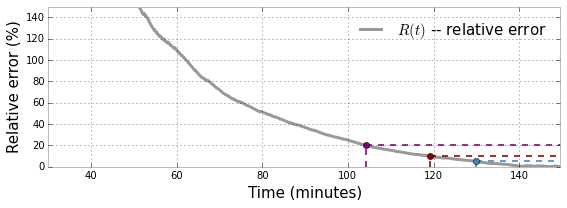

In [14]:
i = 4

df = dfs[keys[good_tracks[i]]]
df_window = df[df['t'] <= window_size]
d = of.calculate_error_window(df_window).set_index('t')
d['min2'] = d['minutes'] - d['minutes'].loc[0]

fig = plt.figure(figsize=(8, 3))
ax = plt.subplot(axisbg='white')
ax.plot(d['minutes'], d['% error'] * 100, 'k', lw=3, alpha=0.4, label=r'$R(t)$ -- relative error')
#ax.plot(d['minutes'], d['error_window'] * 100, alpha=0.7, label='$R^M_i$ -- monotonic relative % error')

cross_point10 = np.where(d['error_window'] <= .1)[0][0]
cross_point5 = np.where(d['error_window'] <= .05)[0][0]

of.add_crosspoint_line(20, ax=ax, d=d, color='purple')
of.add_crosspoint_line(10, ax=ax, d=d, color='darkred')
of.add_crosspoint_line(5, ax=ax, d=d, color='steelblue')

ax.set_xlim([d['minutes'].loc[0], d['minutes'].loc[len(d)]])
ax.set_ylim([0, 150])
ax.set_xlabel('Time (minutes)', size=15)
ax.set_ylabel('Relative error (%)', size=15)
ax.legend(loc='best', frameon=False, fontsize =15)
plt.tight_layout()
plt.savefig('relative-error-decay-fonttest.eps')
plt.show()

### Check what timeseries actually looks like

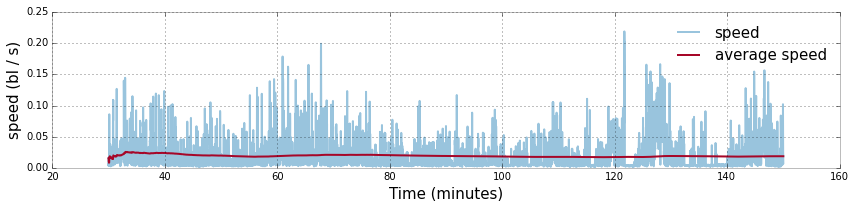

In [44]:
fig = plt.figure(figsize=(12, 3))
ax = plt.subplot(axisbg='white')
ax.plot(d['minutes'], d['bl / s'], alpha=0.5, label='speed')
ax.plot(d['minutes'], d['avg'], label='average speed')

ax.set_xlabel('Time (minutes)', size=15)
ax.set_ylabel('speed (bl / s)', size=15)
ax.legend(loc='best', frameon=False, fontsize =15)

plt.tight_layout()
plt.savefig('example-time-series.png')
plt.show()


# Fig 3 D -- Horizontal Bar Graph

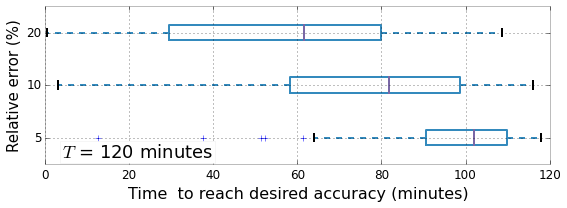

In [47]:
compiled_df = of.compile_error_curves(dfs, window_size=window_size)
bar_graph_df = of.calculate_bar_df(compiled_df)

#################### Bargraph ####################

fig = plt.figure(figsize=(8, 3))
ax = plt.subplot(axisbg='white')
bar_graph_df.T.plot(kind='box', vert=False, ax=ax)
#ax.text(14, 3.2, '20 minute window', size=16)#, bbox={'facecolor':'white'})

text_y = 0.9
text_x = 40 #24.5
# text_y = 0.9
# text_x = 55 #24.5
ax.text(text_x, text_y, '$T$ = {ws} minutes'.format(ws=int(window_size / 60)), size=18, 
        horizontalalignment='right', verticalalignment='top', bbox={'facecolor':'white'})

ax.set_xlabel('Time  to reach desired accuracy (minutes)', size=16)
ax.set_ylabel('Relative error (%)', size=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.savefig('convergence-boxplot-horiz.eps')
plt.show()


In [48]:
window_size / 60

120

# Fig E -- Summary plot
### generate data

In [49]:
dfs = tdfs
cp1s2, cp5s2, cp10s2, cp20s2, cp30s2, cp50s2 = [], [], [], [], [], []
percents = [0.05, 0.1, 0.2] #, 0.3, 0.5]


window_size = 179 * 60
print('max window size = ', window_size/60, 'minutes')
windows = np.arange(1, int(window_size / 60), 5)

percent_data = {}
used_windows = []
for w in windows:
    #print(w)
    try:
        compiled_df = of.compile_error_curves(dfs, window_size=w * 60)
    except ValueError:
        print('skipping all after', w)
        break
    #print compiled_df.shape
    mean = compiled_df.mean(axis=1)
    #print len(mean)
    #print compiled_df.head()
    for percent in percents:
        dat = percent_data.get(percent, [])
        dat.append(np.where(mean < percent)[0][0])
        percent_data[percent] = dat
        
    cp5s2.append(np.where(mean < 0.05)[0][0])
    cp10s2.append(np.where(mean < 0.1)[0][0])
    cp20s2.append(np.where(mean < 0.2)[0][0])
    used_windows.append(w)

('max window size = ', 179, 'minutes')


### plot summary graph

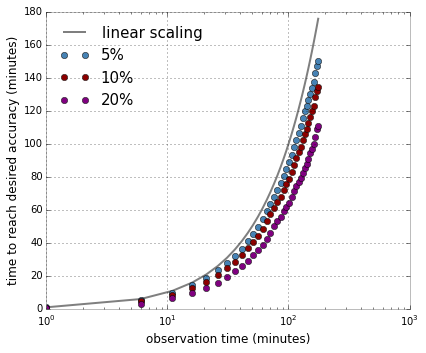

In [57]:
#window_size = 29 * 60
#compiled_df = of.compile_error_curves(dfs, window_size= window_size)

################### scaling graph ####################

fig = plt.figure(figsize=(6, 5))

ax = plt.subplot(axisbg='white')
# for percent in percents:
#     if percent > 0.45:
#         pass
#         #break
#     ax.plot(windows, np.array(percent_data[percent], dtype=float) / 60, 'o-', label='{p}%'.format(p=percent*100))

    
# ax.plot(windows, np.array(cp1s2, dtype=float) / windows / 60, 'o-', label='1%')
ax.plot(used_windows, used_windows, 'k-', label='linear scaling', alpha=0.5)
ax.plot(used_windows, np.array(cp5s2, dtype=float) / 60, 'o', label='5%', color='steelblue')
ax.plot(used_windows, np.array(cp10s2, dtype=float) /60, 'o', label='10%', color='darkred')
ax.plot(used_windows, np.array(cp20s2, dtype=float) / 60, 'o', label='20%', color='purple')
# ax.plot(used_windows, np.array(cp30s2, dtype=float) / used_windows / 60, 'o-', label='30%')
# ax.plot(used_windows, np.array(cp50s2, dtype=float) / used_windows / 60, 'o-', label='50%')


ax.legend(loc='best', fontsize=15, frameon=False)
ax.set_xlabel('observation time (minutes)')
ax.set_ylabel('time to reach desired accuracy (minutes)')
#ax.set_ylim([0, 1])
#ax.semilogy()
ax.semilogx()
plt.tight_layout()
plt.savefig('convergence_percent.eps')
plt.show()    

In [58]:
# alternate version of scaling graph. some things cleaned up.

#window_size = 29 * 60
#compiled_df = of.compile_error_curves(dfs, window_size= window_size)

################### scaling graph ####################


# fig = plt.figure(figsize=(6, 5))

# ax = plt.subplot(axisbg='white')
# for percent in percents:
#     if percent > 0.45:
#         pass
#         #break
#     ax.plot(windows, np.array(percent_data[percent], dtype=float) / 60, 'o-', label='{p}%'.format(p=percent*100))


# ax.legend(loc='best', fontsize=15, frameon=False)
# ax.set_xlabel('$N$ -- observation time (minutes)')
# ax.set_ylabel('$t_x$ -- time to reach $X$% accuracy (minutes)')
# #ax.set_ylim([0, 1])
# #ax.semilogy()
# ax.semilogx()
# plt.tight_layout()
# plt.savefig('convergence_percent.png')
# plt.show()    

In [59]:
# alternate plot not sure if good
#windows = np.arange(1, 120)

# mean_rows = []
# median_rows = []

# for w in windows:
#     #print(w)
#     compiled_df = of.compile_error_curves(dfs, window_size=w * 60)
#     bar_graph_df = of.calculate_bar_df(compiled_df)
#     means = bar_graph_df.mean(axis=1)
#     means.name = w
#     mean_rows.append(means)
    
#     med = bar_graph_df.median(axis=1)
#     med.name = w
#     median_rows.append(med)
# mean_convergence_df = pd.concat(mean_rows, axis=1)
# median_convergence_df = pd.concat(median_rows, axis=1)
# wc = median_convergence_df.copy()
# #wc = mean_convergence_df.copy()

# wc.index = ['5%', '10%', '20%']
# wc = wc.T

# fig = plt.figure(figsize=(6, 5))
# ax = plt.subplot(axisbg='white')
# ax.plot(wc.index, wc.index, 'k-', label='linear scaling', alpha=0.5)
# colors = ['steelblue', 'darkred', 'purple']
# for col, color in zip(wc, colors):
#     ax.plot(wc.index, wc[col], 'o-', label=col, color=color)

# ax.legend(loc='best', frameon=False, fontsize=15)
# ax.set_xlabel('Observation time (minutes)')
# ax.set_ylabel('Time to reach desired accuracy (minutes)')
# ax.set_ylim([0, windows[-1]])
# #ax.set_xlim([0, 50])

# #ax.semilogy()
# #ax.semilogx()
# #plt.tight_layout()
# plt.savefig('convergence_percent2-median-lin.png')
# plt.show()   

# Precursor to Fig 3 A & B: exponential decay fit
### pull data again without truncating first part of recording

In [60]:
track_dfs = of.pull_tracks_for_eids(eids=eids, path=pl)
tdfs = {}
for bid in track_dfs:
    df = track_dfs[bid]
    
    if df is None or not len(df):
        continue

    t0 = df['time'].iloc[0]
    df['t'] = df['time'] - t0
    df['avg'] = df['bl / s'].cumsum() / np.arange(1, len(df)+1)
    tdfs[bid] = df[['time', 't', 'avg', 'bl / s', 'minutes']]
    #tdfs.append(df)

dfs_full = tdfs

retreiving cached tracks for 20150511_121312
retreiving cached tracks for 20150511_121317
retreiving cached tracks for 20150511_160123
retreiving cached tracks for 20150608_121725
retreiving cached tracks for 20150622_121933
retreiving cached tracks for 20150622_121935
retreiving cached tracks for 20150622_121940
retreiving cached tracks for 20150629_165904
retreiving cached tracks for 20150702_150024
('\n', 302, ' tracks in total')


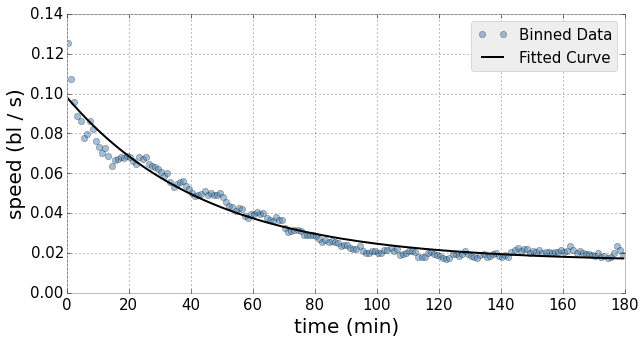

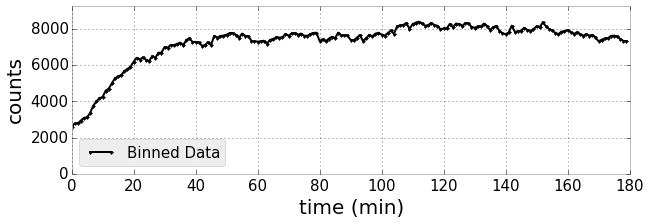

[[  1.55548877e-06   2.75732728e-07  -1.49034701e-07]
 [  2.75732728e-07   7.24755253e-07   5.42341019e-07]
 [ -1.49034701e-07   5.42341019e-07   5.86741172e-07]]

a * np.exp(-b * x) + c
a = 0.083
b = 0.022
c = 0.016

tau = 1/b = 44.914 minutes

previously reported tau is 19 min - Yemini, Jucikas, ... Schafer (2013)


In [61]:
def expon_func(x, a, b, c):
    return a * np.exp(-b * x) + c


def fit_decay_time(track_dfs, plot=True, savename=None):

    def expon_func(x, a, b, c):
        return a * np.exp(-b * x) + c

    # assemble all dataframes into one big df.
    full_data = [df for bid, 
                 df in track_dfs.items()]
    fdf = pd.concat(full_data, axis=0)
    fdf['m'] = np.array(fdf['minutes'], dtype=int)

    avg = pd.pivot_table(fdf, values='bl / s', columns='m', aggfunc=np.mean)
    counts = pd.pivot_table(fdf, values='bl / s', columns='m', aggfunc=len)

    x = np.array(avg.index) + 0.5
    y = np.array(avg)

    params, pcov = curve_fit(expon_func, x, y)

    if plot:

        
        #### Exponential Decay Plot ####
        fig = plt.figure(figsize=(10,5))
        ax = plt.subplot(axisbg='white')
        #ax.plot(fdf['minutes'], fdf['bl / s'], '.', alpha=0.1, label="Origional Data")
        ax.plot(x, y, 'o', label="Binned Data", color='steelblue', alpha=0.5)
        ax.plot(x, expon_func(x, *params), '-', color='k', label="Fitted Curve")
        #ax.set_ylim([0, 0.2])
        ax.legend(fontsize=15)
        ax.set_xlabel('time (min)', size=20)
        ax.set_ylabel('speed (bl / s)', size=20)
        plt.yticks(fontsize=15)
        plt.xticks(fontsize=15)
        if savename is not None:
            plt.savefig(savename)
        plt.show()

        
        #### Counts Plot ####
        fig = plt.figure(figsize=(10,3))
        ax = plt.subplot(axisbg='white')
        #fig, ax = plt.subplots(figsize=(10,3))
        x = np.array(counts.index)
        y = np.array(counts)

        ax.plot(x, y, 'k.-', label="Binned Data")
        ax.legend(loc='best', fontsize=15)
        ax.set_xlabel('time (min)', size=20)
        ax.set_ylabel('counts', size=20)
        ax.set_ylim([0, max(y)*1.1])

        plt.yticks(fontsize=15)
        plt.xticks(fontsize=15)

        plt.show()
    return fdf, params, pcov

def plot_decay(track_dfs):
    fdf, params, pcov = fit_decay_time(track_dfs)
    print(pcov)
    print
    print('a * np.exp(-b * x) + c')
    a,b,c = params
    print 'a = {a}'.format(a=round(a, 3))
    print 'b = {b}'.format(b=round(b, 3))
    print 'c = {c}'.format(c=round(c, 3))
    tau = 1/b
    print 
    print 'tau = 1/b = {t} minutes'.format(t=round(tau, 3))
    print 
    print 'previously reported tau is 19 min - Yemini, Jucikas, ... Schafer (2013)'
    return params
    
#track_dfs = d1_NQ67_tracks
#track_dfs = day_1_eids
params = plot_decay(dfs_full)

# Fig 3 A & B

(25.58465, 179.99496515200002)
(20.1351818182, 112.85076060600001)
(71.683042424199996, 94.846454545499995)
(8.4001962121200009, 146.68254772700001)


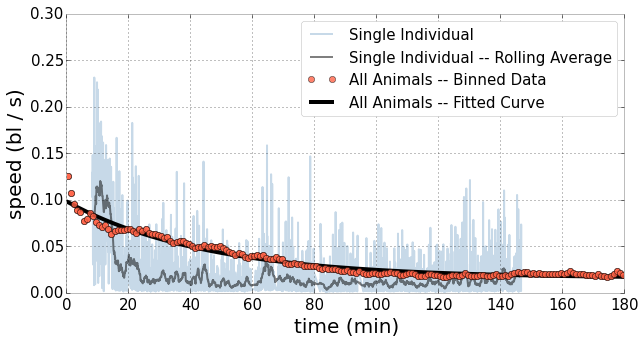

(48.406850075800001, 179.99290454499999)
(13.819692424200001, 179.99471212099999)
(29.536653030300002, 81.679283333300006)
(105.99978939399999, 139.233242424)
(29.066158333299999, 57.716112878800004)
(156.566494697, 179.99290454499999)
(99.938739393899994, 123.98357727299999)
(34.833865909099998, 99.412537878799995)
(34.833865909099998, 179.99290454499999)
(126.467481818, 161.799183333)
(17.6998477273, 43.678648484799993)
(9.3546878787899992, 69.616387121199992)
(31.399372727300001, 58.366694697)
(145.38511666700001, 169.266284848)
(0.25016212121199999, 179.99496515200002)


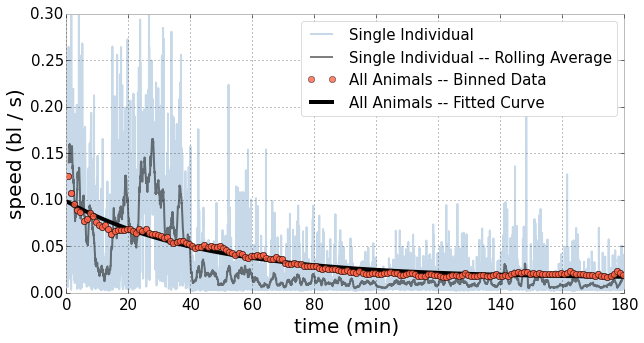

(9.5169636363599999, 34.6779984848)
(123.83359166700001, 153.132859091)
(156.18255454499999, 179.96707878799998)
(15.800506818199999, 178.27942878799999)
(0.016479545454500002, 82.262231818199993)
(0.016479545454500002, 56.812140909100002)
(0.016479545454500002, 141.499565152)


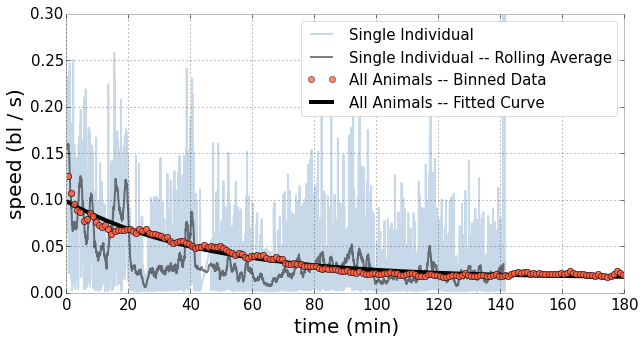

(20.690875757600001, 42.5261636364)
(0.016753030302999999, 57.560627272700003)
(47.834087878799998, 179.99496363599999)
(152.883659091, 179.99290454499999)
(0.021259090909099998, 124.66272121200001)


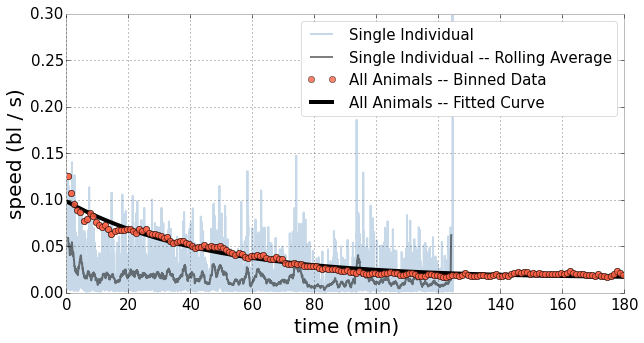

(77.850390151499994, 179.995222727)
(13.835974242400001, 47.377189393900004)
(25.4689560606, 52.882992424199998)
(134.986954545, 179.994984848)
(0.016712121212100001, 33.9664128788)
(49.8505363636, 70.862769697000004)
(104.00367878799999, 179.995481818)
(7.3499060606100013, 179.99496515200002)


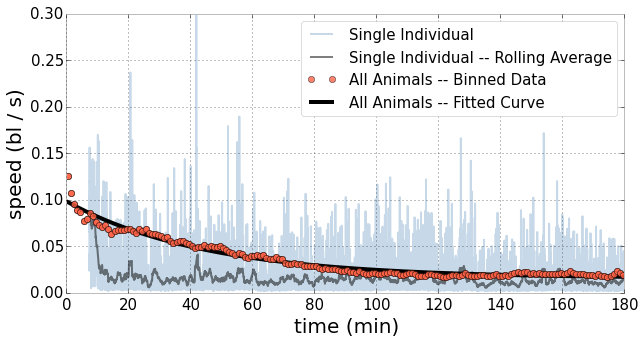

(122.850608333, 145.26254502200001)
(69.638354545500007, 93.767578787900007)
(0.016776515151500002, 24.713100000000001)
(0.016776515151500002, 179.99496515200002)


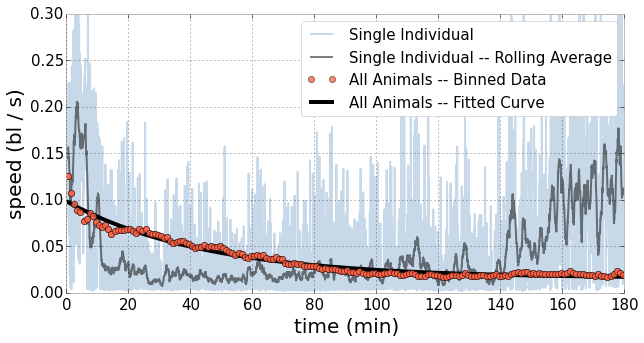

(0.016776515151500002, 71.167194696999999)
(0.016776515151500002, 179.99496515200002)


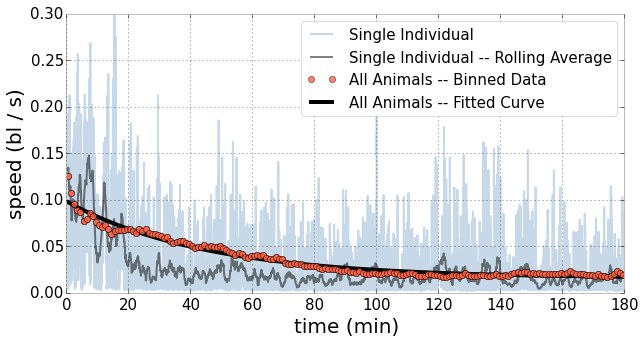

(87.951990909100005, 179.99496363599999)
(15.6329848485, 47.933720454499998)
(15.6329848485, 179.99494393900002)
(29.424651515200001, 179.99290454499999)
(8.6703272727300007, 140.48066818200002)


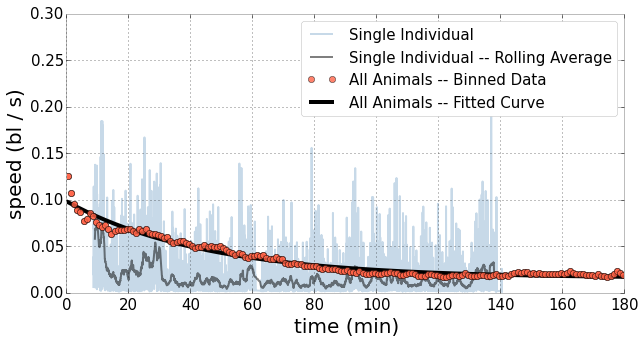

(123.90147878799999, 179.99496363599999)
(123.90147878799999, 179.99496363599999)
(122.52164242399999, 179.99290454499999)
(47.833319697, 179.99290454499999)
(61.416038636400003, 179.99290454499999)
(6.737018181819999, 34.616294697000001)
(8.2179106060600002, 39.6457530303)
(66.617159848500009, 179.99494393900002)
(57.883931818199997, 179.99290454499999)
(0.10343636363600001, 179.995222727)


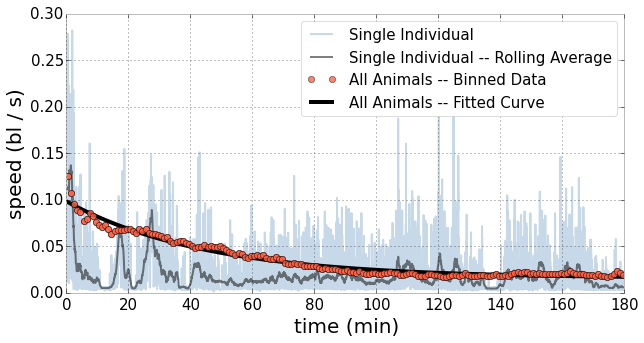

(31.384315151500001, 179.99467121200001)
(122.317207576, 179.99290454499999)
(87.571240909099998, 179.99496363599999)
(5.9551999999999996, 179.994984848)


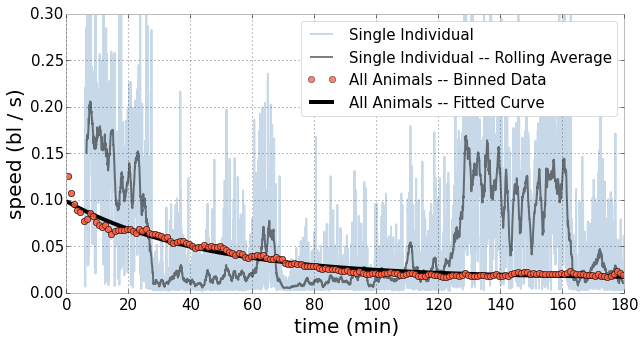

(20.635969697, 179.99467121200001)
(11.233762121199998, 42.531322727300001)
(6.1706833333300004, 179.994984848)


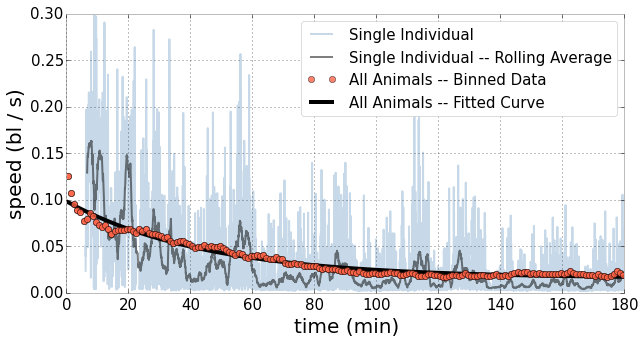

(43.550524242399995, 144.325583333)
(6.0831507575800003, 58.014715151499999)
(141.51898939399999, 179.99467121200001)
(141.51898939399999, 179.99467121200001)
(27.6680378788, 70.4499159091)
(22.255165151500002, 44.698942424199998)
(39.552560606100002, 64.149837121199994)
(71.250588636400011, 175.62627121200001)
(42.582978787899997, 89.183603787900012)
(45.138587878800003, 112.90060303)
(47.869125757600003, 86.000324242399998)
(2.94999848485, 51.099915931400005)
(34.8829537879, 71.083571969700003)
(11.58745, 39.533104545500002)
(45.867086363599995, 179.99496515200002)
(158.483335606, 179.88375681799999)
(91.771663636399992, 179.99494393900002)
(91.771663636399992, 179.99494393900002)
(47.6181757576, 179.994984848)
(32.768803030299999, 74.595271212100002)
(79.999886363599998, 169.699578409)
(99.43273560610001, 179.99290454499999)
(34.900825757600003, 77.833160606099995)
(90.333823484799993, 115.117657576)
(124.683016667, 145.08000303)
(57.319921212099999, 140.48066818200002)
(35.23290757

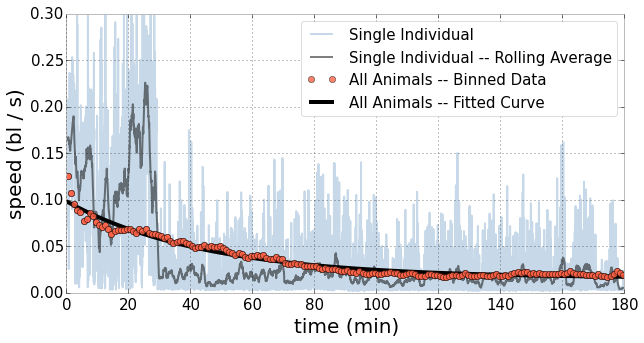

(100.917545455, 176.41647954499999)
(9.4838840909100011, 47.817516666700001)
(79.999886363599998, 169.266284848)
(0.066841666666699995, 179.99496515200002)


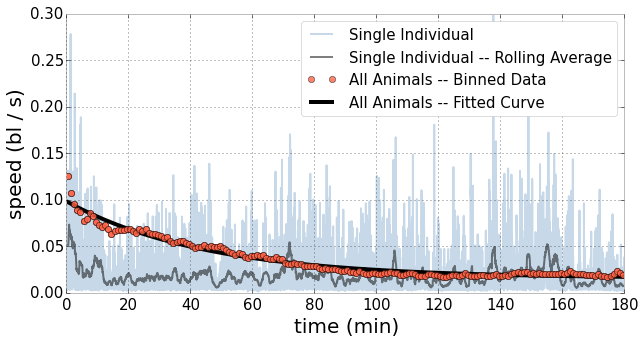

(63.738810606099996, 179.994984848)
(26.2180393939, 179.99496515200002)
(158.18323106100001, 179.995481818)
(95.050308333299995, 179.99496363599999)
(95.050308333299995, 177.616459091)
(71.250588636400011, 118.34944545499999)
(104.78626666700001, 137.68111515200002)
(6.870366666669999, 26.895160606100003)
(50.317062878800002, 179.99496515200002)
(54.033340909099998, 112.89980151499999)
(0.016753030302999999, 24.016862242399998)
(105.717026515, 179.99496363599999)
(11.270690909100001, 40.128100000000003)
(8.204569696970001, 30.800712878800002)
(150.973387879, 179.99290454499999)
(26.8334621212, 153.146193939)
(61.133088636400004, 179.99290454499999)
(0.016753030302999999, 89.266985606100008)
(42.900196969699998, 179.99496363599999)
(54.682865151499996, 90.200038636399995)
(0.016191666666700001, 179.995481818)


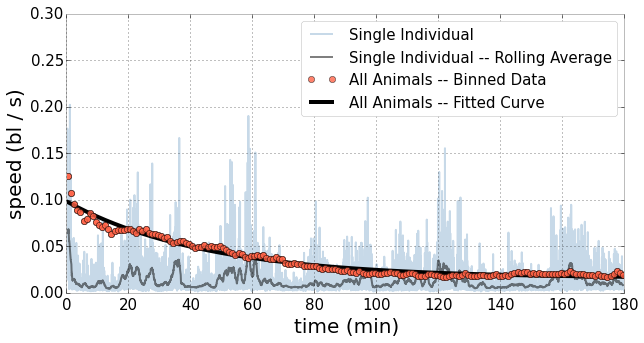

(0.0328704545455, 29.782938636399997)
(0.016191666666700001, 141.67870454499999)


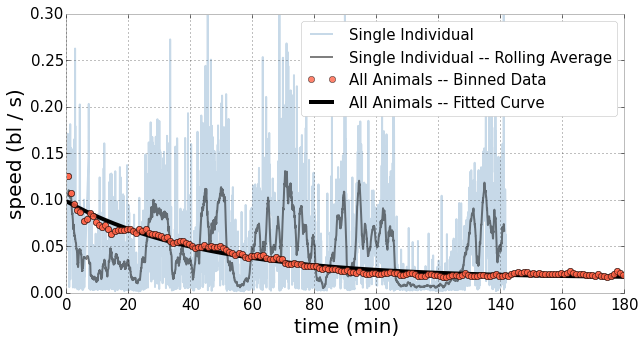

(0.016191666666700001, 78.628622727299998)
(0.016191666666700001, 26.116828030300002)
(0.016191666666700001, 24.38345)
(1.1510810606100002, 42.531322727300001)
(0.016191666666700001, 141.67870454499999)


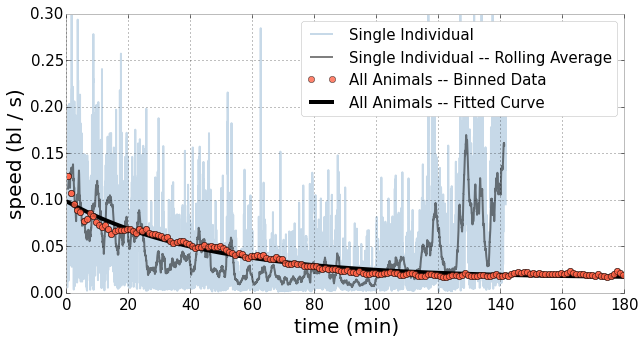

(92.532891666699996, 179.99290454499999)
(68.721992424199996, 121.53447727299999)
(3.70036287879, 179.99467121200001)


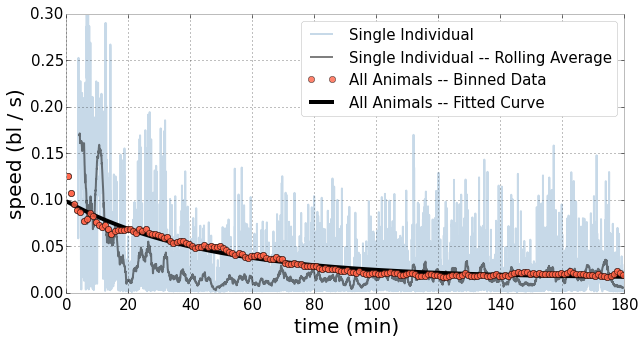

(0.0328704545455, 179.995481818)


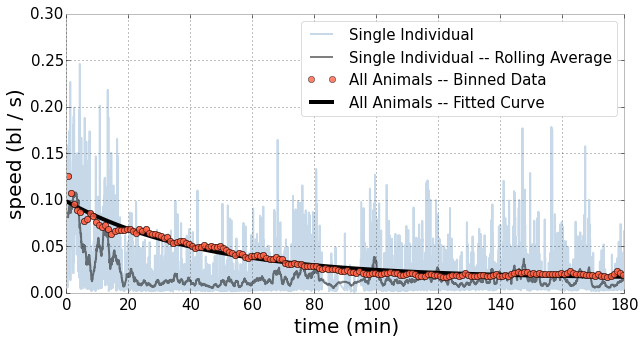

(0.068963636363600006, 24.0168128788)
(24.599604545500004, 179.995481818)
(24.038465151500002, 157.944822727)
(143.64982575799999, 179.995481818)
(151.46700454500001, 179.99290454499999)
(142.31709924200001, 179.99496363599999)
(0.016283333333299999, 179.99471212099999)


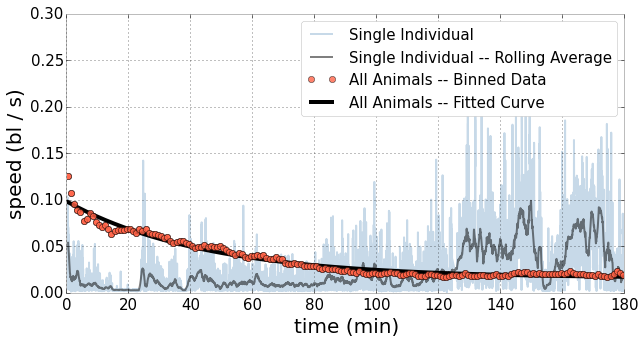

(70.882819697000002, 118.34944545499999)
(140.500105303, 179.99467121200001)
(28.166397727300001, 179.99471212099999)
(145.302028788, 165.91566818200002)
(61.284219696999997, 99.412537878799995)
(43.735789393900006, 87.550328030300008)
(61.284219696999997, 150.95034545499999)
(93.900312121200002, 179.99496363599999)
(11.235171212100001, 46.900430303)
(0.89992803030300006, 25.449625757600003)
(140.84973863600001, 179.99290454499999)
(57.139299999999999, 179.99471212099999)
(87.132841666700003, 137.68111515200002)
(12.882664393900001, 57.716112878800004)
(46.3010863636, 179.99290454499999)
(46.3010863636, 179.99290454499999)
(74.616950757600009, 178.27942878799999)
(0.016815151515200001, 22.076077272700001)
(11.235171212100001, 34.950355303000002)
(126.467481818, 179.99290454499999)
(45.867086363599995, 179.99496515200002)
(106.086115152, 144.430684848)
(71.319404545500007, 179.99496515200002)
(124.00824697, 153.19175454500001)
(13.766183057899999, 99.212690909100004)
(43.301886363599998

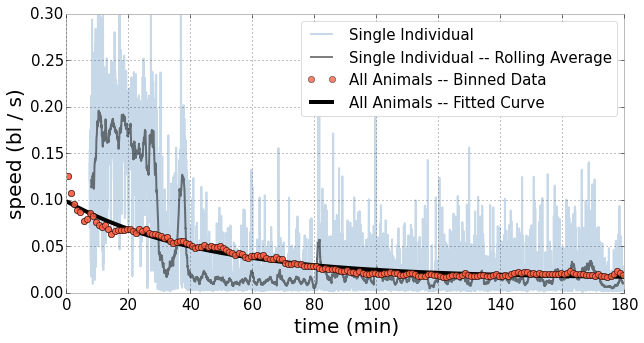

(159.98342424200001, 179.99290454499999)
(15.616846969700001, 53.0327469697)
(141.95150454500001, 179.995481818)
(149.32305606100002, 179.99290454499999)
(14.383487121199998, 179.99496363599999)
(14.085295454500001, 40.597778787899998)
(3.6834962121199997, 179.994984848)


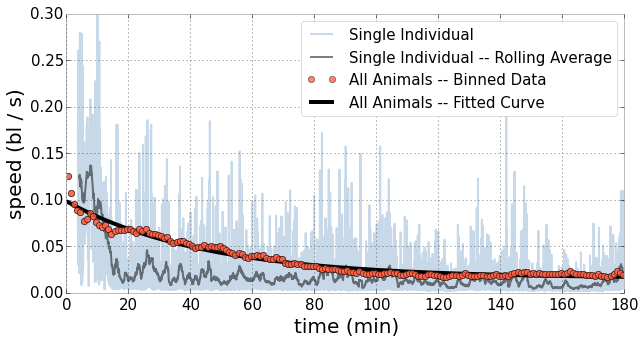

(29.536653030300002, 57.829490909099995)
(35.699798484799999, 132.330274242)
(69.883058333299999, 123.73235227299999)
(15.350115151500001, 47.2996818182)
(6.2834348484800007, 42.010796969699996)
(0.16845757575800002, 70.4499159091)
(39.056025757600004, 76.367335606099999)
(145.61752348499999, 173.60085000000001)
(112.919798485, 155.44793636399999)
(55.099655302999999, 177.616459091)
(20.949362878800002, 42.413613636400001)
(47.834087878799998, 105.97808939399999)
(116.349673485, 154.18388409100001)
(24.733059848499998, 179.99496515200002)
(45.719272727299995, 179.99496515200002)
(149.85037575799998, 179.994984848)
(34.116962878800003, 58.0165287879)
(22.5335189394, 123.366534375)
(51.583176515200002, 79.6671590909)
(0.0162431818182, 179.994984848)


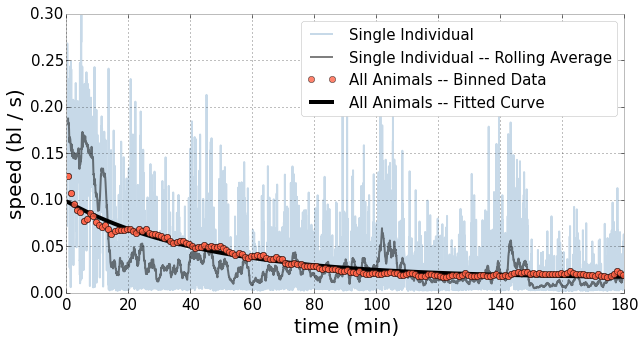

(94.767020454500013, 179.99496363599999)
(128.122193939, 179.99290454499999)
(28.832684848499998, 58.381621212100001)
(21.099731818199999, 58.499697727299996)
(5.3668242424199999, 179.994984848)


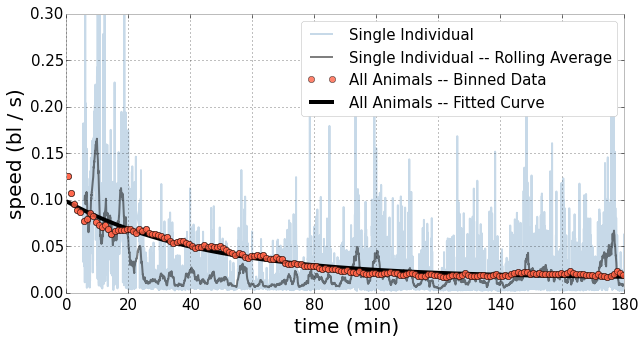

(0.016815151515200001, 25.564056060599999)
(64.1708318182, 105.71667424200001)
(28.166397727300001, 179.99471212099999)
(10.4878681818, 64.114827272699998)
(66.617159848500009, 179.99494393900002)
(17.9368136364, 40.128100000000003)
(109.70003787899999, 179.99467121200001)
(31.151307575800001, 179.995481818)
(1.6832340909099999, 32.883520454500001)
(31.151307575800001, 93.283654545499999)
(42.565948181799996, 179.99290454499999)
(107.033934179, 179.99290454499999)
(6.3340424242400006, 53.816306818199998)
(58.5168681818, 89.183603787900012)
(0.13346363636399999, 179.99496515200002)


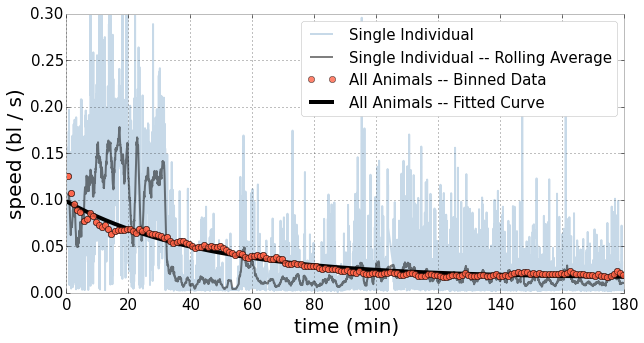

(20.553613636400001, 179.99496515200002)
(0.067398484848500001, 179.99496515200002)


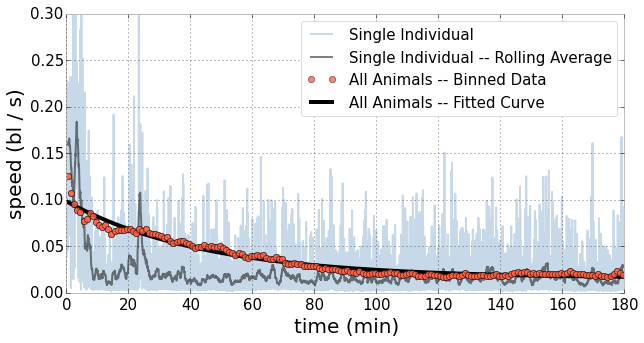

(0.116777272727, 179.99496515200002)


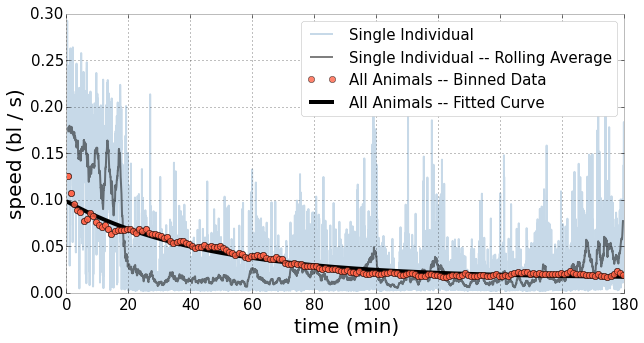

(29.4505113636, 99.212690909100004)
(3.8167939393900001, 24.428513636399998)
(156.566494697, 179.99290454499999)
(93.799724999999995, 176.41651893900001)
(113.01683712100001, 143.26613939399999)
(10.9855318182, 55.966182575799998)
(7.7996916666699994, 31.916981060599998)
(99.233518181800008, 179.99290454499999)
(0.016776515151500002, 26.196951515199999)
(45.016591666700002, 90.200038636399995)
(0.016231060606100002, 179.995222727)


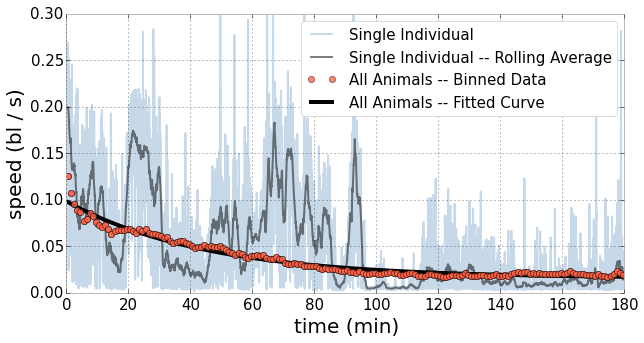

(11.5002083333, 43.3666340909)
(11.220124242400001, 42.982721212100003)
(82.6836181818, 179.995481818)
(115.337613636, 159.96289545499999)
(0.016815151515200001, 146.04392121200001)


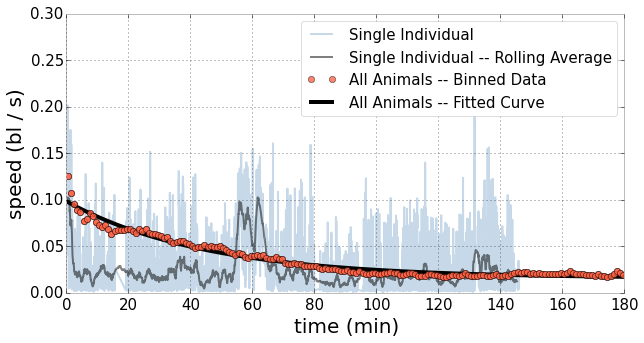

(0.016231060606100002, 22.048006060599999)
(17.068946969700001, 43.699537121200002)
(70.983278030299999, 91.364741666699999)
(90.401910606100003, 123.98357727299999)
(25.438583333299999, 134.96639090899998)
(58.366376515200002, 93.879189393899992)
(32.150320454499997, 179.99471212099999)
(124.683016667, 179.99290454499999)
(0.016479545454500002, 88.465015151499998)
(90.401910606100003, 122.82528333299999)
(26.2829590909, 47.2996818182)
(89.450763636399998, 179.99496363599999)
(13.352610606099999, 101.410427273)
(20.149611363599998, 53.466368939399999)
(68.382744696999993, 101.410427273)
(0.016283333333299999, 179.99471212099999)


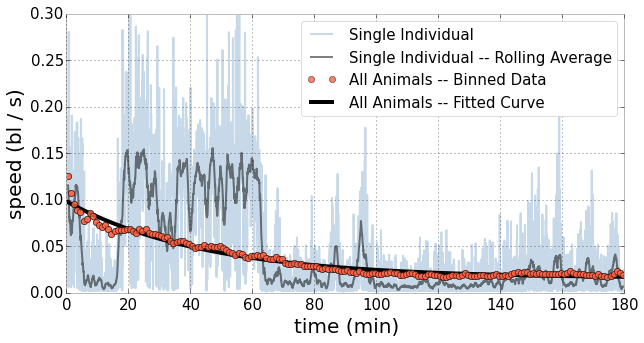

(26.399573484800001, 47.8163371212)
(0.62180454545500008, 27.3497015152)
(24.200725757600001, 179.99496363599999)
(103.237686364, 145.08000303)
(103.237686364, 126.11620681799999)
(57.582974999999998, 179.99496363599999)
(0.049589393939399998, 23.897448484800002)
(145.601695455, 179.99290454499999)
(0.11736969697000001, 51.528716666699999)
(51.124169696999999, 99.916240151499991)
(145.68829697000001, 165.91566818200002)
(145.68829697000001, 165.258448485)
(0.016231060606100002, 34.583039393900002)
(5.0335060606099997, 179.994984848)


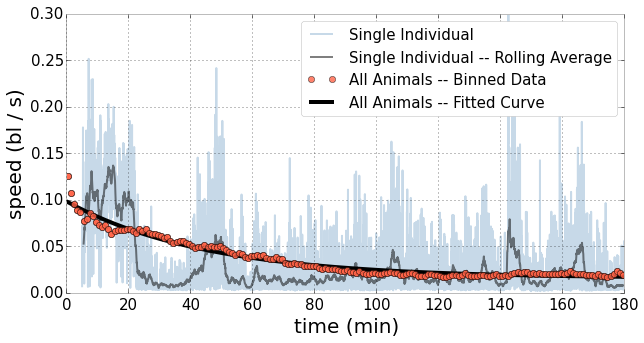

(53.835277272700004, 146.68254772700001)
(32.287415151499999, 74.366801515200009)
(0.016231060606100002, 179.995222727)


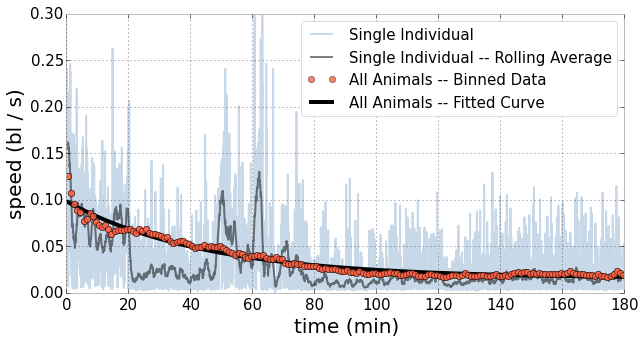

(150.973387879, 179.99290454499999)
(6.4662765151499997, 50.266537878800001)
(76.839790909100003, 179.99290454499999)
(12.6496371212, 47.933720454499998)
(86.216766666699996, 126.11620681799999)
(18.583468939399999, 45.217197727299997)
(86.099824242400004, 112.71100151500001)
(86.099824242400004, 112.71100151500001)
(43.735789393900006, 179.99496363599999)


In [62]:
def plot_single_and_global_decay(track_dfs, fdf, params, track_id, save_as='eps'):
    df = track_dfs[track_id]
    df2 = pd.rolling_mean(df, window=60)

    avg = pd.pivot_table(fdf, values='bl / s', columns='m', aggfunc=np.mean)
    counts = pd.pivot_table(fdf, values='bl / s', columns='m', aggfunc=len)

    x = np.array(avg.index) + 0.5
    y = np.array(avg)
    
    fig = plt.figure(figsize=(10,5))
    ax = plt.subplot(axisbg='white')
    #ax.plot(fdf['minutes'], fdf['bl / s'], '.', alpha=0.1, label="Origional Data")
    #ax.plot(df['minutes'], df['bl / s'], '.', alpha=0.5, label='single worm') #, color='steelblue'

    ax.plot(df['minutes'], df['bl / s'], '-', alpha=0.3, label='Single Individual', color='steelblue')
    ax.plot(df2['minutes'], df2['bl / s'], '-', alpha=0.5, label='Single Individual -- Rolling Average', color='k')

    ax.plot(x, y, 'o', alpha=0.8, label="All Animals -- Binned Data", color='tomato')
    ax.plot(x, expon_func(x, *params), '-', lw=4, label="All Animals -- Fitted Curve", color='k',)
    ax.plot(x, y, 'o', alpha=0.8, color='tomato')


    ax.set_ylim([0, .30])
    legend = ax.legend(fontsize=15)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    #frame.set_edgecolor('red')

    ax.set_xlabel('time (min)', size=20)
    ax.set_ylabel('speed (bl / s)', size=20)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    if save_as is not None:
        savename = 'single_global_decay-{t}.{sa}'.format(t=track_id, sa=save_as)
        plt.savefig(savename)
    plt.show()
    
    
    
track_dfs = dfs_full
track_ids = list(dfs.keys())

full_data = [df for bid, 
             df in track_dfs.items()]
fdf = pd.concat(full_data, axis=0)
fdf['m'] = np.array(fdf['minutes'], dtype=int)


for track in track_ids:
    df = track_dfs[track]
    #print('track: {bid} \t| len:{l}'.format(bid=track, l=len(df)))
    #fig = plt.figure(figsize=(10, 1))
    start_time, end_time = min(df['minutes']), max(df['minutes'])
    print(start_time, end_time)
    if end_time - start_time < 120:
        continue
    if start_time > 10:
        continue
    s = df['bl / s']
    if max(s) < 0.05:
        continue
        
    track_id = track
    plot_single_and_global_decay(track_dfs, fdf, params, track_id, save_as='png')

# Old Figures

In [ ]:
# def plot_compiled2(df):
#     fig = plt.figure(figsize=(10, 3))
#     ax = plt.subplot(axisbg='white')
#     minutes = np.array(df.index) / 60.0
#     mean = compiled_df.mean(axis=1)
#     for col in df:
#         ax.plot(minutes, df[col], 'k', alpha=0.5)
    
#     ax.plot(minutes, mean, 'orange', lw=3)
    
#     cross_point10 = np.where(mean < 0.001)[0][0] / 60.0
#     ax.plot([cross_point10, cross_point10], [0, 0.5], color='steelblue', lw=2)
    
#     cross_point5 = np.where(mean < 0.005)[0][0] / 60.0
#     ax.plot([cross_point5, cross_point5], [0, 0.5], color='darkred', lw=2)
    
#     cross_point5 = np.where(mean < 0.01)[0][0] / 60.0
#     ax.plot([cross_point5, cross_point5], [0, 0.5], color='green', lw=2)
    
#     ax.set_ylabel('error (bl / s)')
#     ax.set_xlabel('time (minutes)')
#     ax.set_ylim([0, 0.06])
#     plt.show()

In [ ]:
#Old Version of Fig

window_size = 2 * 60 * 60 # seconds
compiled_df = of.compile_error_curves(dfs, window_size=window_size)
of.plot_compiled(compiled_df)
plt.tight_layout()
plt.savefig('percent_error-1min.png')

window_size = 60 * 20
compiled_df = of.compile_error_curves(dfs, window_size=window_size)
of.plot_compiled(compiled_df)
plt.tight_layout()
plt.savefig('percent_error-20min.png')
plt.show()

In [ ]:
dfs = tdfs
aa, bb, cc, dd, ee = [], [], [], [], []
windows2 = np.arange(1, 29)
for w in windows2:
    compiled_df = of.compile_error_curves(dfs, window_size=w * 60)
    mean = compiled_df.mean(axis=1)
    aa.append(np.where(mean < 0.001)[0][0])
    bb.append(np.where(mean < 0.002)[0][0])
    cc.append(np.where(mean < 0.003)[0][0])
    dd.append(np.where(mean < 0.005)[0][0])
    ee.append(np.where(mean < 0.01)[0][0]) 
    
    
fig = plt.figure(figsize=(10, 10))

ax = plt.subplot(axisbg='white')
ax.plot(windows2, np.array(aa, dtype=float) / windows2 / 60, 'o-', label='0.001')
ax.plot(windows2, np.array(bb, dtype=float) / windows2 /60, 'o-', label='0.002')
ax.plot(windows2, np.array(cc, dtype=float) / windows2 / 60, 'o-', label='0.03')
ax.plot(windows2, np.array(dd, dtype=float) / windows2 /60, 'o-', label='0.005')
ax.plot(windows2, np.array(ee, dtype=float) / windows2 / 60, 'o-', label='0.01')

ax.legend(loc='best', frameon=False)
ax.set_xlabel('observation time (minutes)')
ax.set_ylabel('fraction of observation time to be withing X of final point')
#ax.set_ylim([0, 1])
#ax.semilogy()
plt.tight_layout()
plt.savefig('convergence_absolute.png')
plt.show()

In [ ]:
dfs = tdfs
ws2 = []
e005s, e01s, e02s = [], [], []

window_sizes = [5, 10, 30, 60, 120, 140]
for window_size in window_sizes:
    compiled_df = of.compile_error_curves(dfs, window_size=window_size * 60)
    of.plot_compiled(compiled_df)

    mean = compiled_df.mean(axis=1)
    ws2.append(window_size)
    e005s.append(np.where(mean < 0.001)[0][0])
    e01s.append(np.where(mean < 0.005)[0][0])
    e02s.append(np.where(mean < 0.01)[0][0])
    print(len(ws2), len(e01s))

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(axisbg='white')
#ax.plot(ws2, np.array(e005s) / 60.0, 'o-', label='0.001 bl / s')
ax.plot(ws2, np.array(e01s) / 60.0, 'o-', label='0.005 bl / s')
ax.plot(ws2, np.array(e02s) / 60.0, 'o-', label='0.01 bl / s')

ax.legend(loc='best')
ax.set_xlabel('observation time (minutes)')
ax.set_ylabel('time to reach mean accuracy (minutes)')

plt.show()

# Check what dfs actually look like

In [ ]:
for d in dfs.values():
    fig, ax = plt.subplots(figsize=(20,3))
    ax.plot(d['minutes'], d['bl / s'], '.')
    plt.show()

In [ ]:
#fdf, params, pcov = fit_decay_time(track_dfs, savename='group-speed-decay-d1-nq67.eps')

#track_dfs = d1_NQ67_tracks
#fdf, params, pcov = fit_decay_time(track_dfs, plot=False)
#track_ids = range(len(track_dfs))  #list(track_dfs.keys())
def distribution_fit_insert(df, start_t=30, insert_shift=0.4, track_id=''):
    
    df = df[df['minutes'] > start_t]
    s = np.array(df['bl / s'])
    
    fig = plt.figure(figsize=(5, 5))
    x = np.linspace(min(s), max(s), 1000)
    loc, scale = stats.expon.fit(s)
    dist = stats.expon(loc=loc, scale=scale)

    ax = plt.subplot(axisbg='white')
    ax.hist(s, bins=100, normed=True, color='steelblue', lw=0.1)
    ax.plot(x, dist.pdf(x), color='darkred', lw=2)
    ax.set_xlabel('speed (bl / s)', fontsize=15)
    ax.set_ylabel('pdf', fontsize=15)
    ax.yaxis.set_tick_params('major', length=5, width=1)
    ax.xaxis.set_tick_params('major', length=5, width=1)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.grid(b=False)

    p = insert_shift
    ax2 = plt.axes([p, p, .87-p, .87-p], axisbg='w')
    ax2.hist(s, bins=100, normed=True, color='steelblue', lw=0.1)
    ax2.plot(x, dist.pdf(x), color='darkred', lw=2)
    ax2.set_yscale('log')
    ax2.set_ylabel('pdf', fontsize=15)
    ax2.set_xlabel('speed (bl / s)', fontsize=15)
    ax2.set_xlim([0, min([0.22, max(s)])])

    ax2.xaxis.set_tick_params(length=10, width=1)
    ax2.yaxis.set_tick_params('major', length=5, width=1)
    ax2.yaxis.set_tick_params('minor', length=3, width=1)
    ax2.grid(b=False)

    xtick_values = [i for i in [0, 0.05, 0.1, 0.15, 0.2, 0.25]
                    if i < max(s)]

    plt.setp(ax2, xticks=xtick_values[:- 1])
    plt.setp(ax, xticks=xtick_values)

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig('expon-fit-insert-{t}.eps'.format(t=track_id))

    plt.show()

def distribution_fit_survival_insert(df, start_t=30, insert_shift=0.5, track_id='', insert=True):
    
    df = df[df['minutes'] > start_t]
    s = np.array(df['bl / s'])

    fig = plt.figure(figsize=(5, 5))
    x = np.linspace(min(s), max(s), 1000)
    loc, scale = stats.expon.fit(s)
    dist = stats.expon(loc=loc, scale=scale)

    ax = plt.subplot(axisbg='white')
    sx, sy = of.make_cdf(s) 
    ax.plot(x, dist.sf(x), color='darkred', lw=2, alpha=0.8, label='fit')

    ax.plot(sx, 1.0 - np.array(sy), color='darkblue', lw=3.0, alpha=0.5, label='emperical')
    #ax.hist(s, bins=100, normed=True, color='steelblue', lw=0.1)
    ax.set_xlabel('speed (bl / s)', fontsize=15)
    ax.set_ylabel('survival function', fontsize=15)
    ax.yaxis.set_tick_params('major', length=5, width=1)
    ax.xaxis.set_tick_params('major', length=5, width=1)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.grid(b=False)
    ax.legend(loc='lower right', frameon=False, fontsize=15)
    
    xtick_values = [i for i in [0, 0.05, 0.1, 0.15, 0.2, 0.25]
                    if i < max(s)]   
    
    
    if insert:
        p = insert_shift
        ax2 = plt.axes([p, p, .87-p, .87-p], axisbg='w')
        #ax2.hist(s, bins=100, normed=True, color='steelblue', lw=0.1)
        ax2.plot(x, dist.sf(x), color='darkred', lw=2, alpha=0.8, label='fit')

        sx, sy = of.make_cdf(s) 
        ax2.plot(sx[:-1], (1.0 - np.array(sy))[:-1], color='darkblue', lw=3.0, alpha=0.5, label='data')

        ax2.set_yscale('log')
        ax2.set_ylabel('survival function', fontsize=15)
        ax2.set_xlabel('speed (bl / s)', fontsize=15)
        ax2.set_xlim([0, min([0.22, max(s)])])

        ax2.xaxis.set_tick_params(length=10, width=1)
        ax2.yaxis.set_tick_params('major', length=5, width=1)
        ax2.yaxis.set_tick_params('minor', length=3, width=1)
        ax2.grid(b=False)

        plt.setp(ax2, xticks=xtick_values[::2])
    else:
        track_id

        
    plt.setp(ax, xticks=xtick_values)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    if insert:
        insert_string = 'insert-'
    else:
        insert_string = ''
    plt.savefig('expon-fit-survival-{i}{t}.eps'.format(i=insert_string, t=track_id))
    #plt.savefig('expon-fit-survival-insert.pdf')
    plt.show()
    
    
bid = 0 #track_ids[1]
track_dfs = dfs
print(bid)
#print track_dfs[bid]
#bid = '20130318_131113-20'
#df = d1_n2_tracks[bid]
distribution_fit_insert(df=track_dfs[bid])
distribution_fit_survival_insert(df=track_dfs[bid])

In [ ]:
for i, (track, df) in enumerate(track_dfs.items()):
    break
df
def check_stability(x, y, closeness):
    #lower, upper = [], []
    null_hyp = []
    reject = []
    first_pass = None
    last_fail = None
    for pos in range(len(x)):
        segment = y[pos:]
        segment_x = x[pos:]
        #print segment

        current = y[pos]
        if np.isnan(current):
            continue
        l = current * (1.0 - (closeness / 1.0))
        u = current * (1.0 + (closeness / 1.0 ))
        if max(segment) > u or min(segment) < l:
            reject.append((x[pos], y[pos]))
        else:          
            null_hyp.append((x[pos], y[pos]))
            if first_pass == None:
                first_pass = (x[pos], y[pos], l, u) 
                
        if first_pass == None:
            last_fail = (x[pos], y[pos], l, u)   
    return null_hyp, reject, first_pass, last_fail

In [ ]:
def within_percent_of_current3(x, y, df, bid, save_as=None):

    fig = plt.figure(figsize=(10, 6))
    ax = plt.subplot(211, axisbg='white')

    df = df[df['minutes'] > 30]
    df2 = pd.rolling_mean(df, window=60)

    ax.plot(df['minutes'], df['bl / s'], alpha=0.5, label='raw')
    ax.plot(df2['minutes'], df2['bl / s'], color='k', alpha=0.7, label='rolling average')
    ax.plot(x + 30, y, color='darkred', label='mean')
    ax.legend(loc='best', frameon=False, fontsize=15)
    ax.set_ylabel('speed', size=15)
    ax.set_xlabel('time (minutes)', size=15)
    
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    
    ax = plt.subplot(212, axisbg='white')
    #ax.plot(x, y, '-', color='blue', alpha=0.5)


    #ax.plot(x, y, 'o', color='black', alpha=1)
    closeness = 0.1
    null_hyp, reject, first_pass, last_fail = check_stability(x, y, closeness)     
    xc, yc, l, u = first_pass
    ax.plot([xc, x[-1]], [yc, yc], '-', color='black', lw=0.5)
    ax.fill_between([xc, x[-1]], [l, l], [u, u], color='steelblue', alpha=0.2)
    ax.plot([xc, xc], [l, u], '-', color='black')

    closeness = 0.2
    null_hyp, reject, first_pass, last_fail = check_stability(x, y, closeness)     
    xc, yc, l, u = first_pass
    ax.plot([xc, x[-1]], [yc, yc], '-', color='black', lw=0.5)
    ax.fill_between([xc, x[-1]], [l, l], [u, u], color='steelblue', alpha=0.1)
    ax.plot([xc, xc], [l, u], '-', color='black')
    
    ax.plot(x, y, 'o-', color='darkred')
    
    ax.set_ylabel('mean speed', size=15)
    ax.set_xlabel('observation time (minutes)', size=15)
    
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    
    plt.tight_layout()
    if save_as is not None:
        plt.savefig('stability_examples--{bid}.{sa}'.format(bid=bid, sa=save_as))
    plt.show()
    return first_pass

    
bid = track_ids[2]
# print bid
#bid = '20130318_142605-87'
#bid = '20130318_131113-10'
# bid = '20130318_142605-178'

for bid in windows:
    print bid
    x = np.array(windows[bid])
    y = np.array(means[bid])
    within_percent_of_current3(x, y, track_dfs[bid], bid)
    if bid > 10:
        break
#within_percent_of_current(x, y, closeness=0.2, plot=True)

In [ ]:
def within_percent_of_current4(x, y, bid=''):

    fig = plt.figure(figsize=(10, 3))
    ax = plt.subplot(axisbg='white')
    #ax.plot(x, y, '-', color='blue', alpha=0.5)


    #ax.plot(x, y, 'o-', lw=1)
    ax.plot(x, y, 'o-', color='black', lw=1)
    closeness = 0.1
    null_hyp, reject, first_pass, last_fail = check_stability(x, y, closeness)     
    xc, yc, l, u = first_pass
    #ax.plot([xc, x[-1]], [yc, yc], '-', color='black', lw=0.5)
    ax.fill_between([xc, x[-1]], [l, l], [u, u], color='steelblue', alpha=0.2)
    ax.plot([xc, x[-1]], [l, l], color='black', alpha=0.3)
    ax.plot([xc, x[-1]], [u, u], color='black', alpha=0.3)
    ax.plot([xc, xc], [0, u], '-', color='black', lw=1)

    
    closeness = 0.3
    null_hyp, reject, first_pass, last_fail = check_stability(x, y, closeness)     
    xc, yc, l, u = first_pass
    #ax.plot([xc, x[-1]], [yc, yc], '-', color='black', lw=0.5)
    ax.fill_between([xc, x[-1]], [l, l], [u, u], color='steelblue', alpha=0.05)
    ax.plot([xc, x[-1]], [l, l], color='black', alpha=0.2)
    ax.plot([xc, x[-1]], [u, u], color='black', alpha=0.2)
    ax.plot([xc, xc], [0, u], '-', color='black', lw=1)

    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    
    ax.set_ylabel('mean speed', size=15)
    ax.set_xlabel('observation time (minutes)', size=15)
    plt.savefig('stability_plot{c}--{bid}.eps'.format(bid=bid, c=closeness))
    plt.show()
    return first_pass

print bid
x = np.array(windows[bid])
y = np.array(means[bid])
within_percent_of_current4(x, y, bid)

In [ ]:
def within_percent_of_current(x, y, closeness = 0.1, plot=False):

    null_hyp = []
    reject = []

    #lower, upper = [], []
    first_pass = None
    last_fail = None
    for pos in range(len(x)):
        segment = y[pos:]
        segment_x = x[pos:]

        current = y[pos] #np.mean(segment)
        l = current * (1.0 - (closeness / 1.0))
        u = current * (1.0 + (closeness / 1.0 ))

        if max(segment) > u or min(segment) < l:
            reject.append((x[pos], y[pos]))
        else:          
            null_hyp.append((x[pos], y[pos]))
            if first_pass == None:
                first_pass = (x[pos], y[pos], l, u) 
                
        if first_pass == None:
            last_fail = (x[pos], y[pos], l, u)   
    
    if plot:
        fig = plt.figure(figsize=(10, 3))
        ax = plt.subplot(axisbg='white')
        ax.plot(x, y, '-', color='blue', alpha=0.5)

        ax.plot(x, y, 'o-')
        xc, yc, l, u = first_pass
        ax.plot(x, [yc for _ in x], '-', color='black')
        ax.plot([xc, xc], [l, u], '-', color='black')
        ax.plot(x, [l for _ in x], '--', color='black')
        ax.plot(x, [u for _ in x], '--', color='black')

        if len(reject):
            xr, yr = zip(*reject)
            ax.plot(xr, yr, 'o', color='red')
        if len(null_hyp):
            xn, yn = zip(*null_hyp)
            ax.plot(xn, yn, 'o', color='black')
        #ax.plot([x[-pos - 1]], [y[-pos - 1]], 'o', color='red')
        #ax.set_title('position {p}'.format(p=pos))
        ax.set_ylabel('exponential scale factor')
        ax.set_xlabel('observation window (min)')
        plt.savefig('stability_measure{c}--20130318_153741-928.png'.format(c=closeness))
        plt.show()
    return first_pass


def create_stability_df(windows, scales, means, closeness = 0.1):
    stabilities = {}
    for bid in windows.keys():
        x = np.array(windows[bid])
        y = np.array(scales[bid])
        first_pass = within_percent_of_current(x, y, closeness=closeness, plot=False)
        fpx, fpy, l, u = first_pass
        stabilities[bid] = {'scale-window':fpx,
                            'scale': fpy,
                            'scale-lower': l, 
                            'scale-upper': u} 

        y = np.array(means[bid])
        first_pass = within_percent_of_current(x, y, closeness=closeness, plot=False)
        fpx, fpy, l, u = first_pass
        stabilities[bid].update({'mean-window':fpx,
                                'mean':fpy,
                                'mean-lower': l, 
                                'mean-upper': u})
    return pd.DataFrame(stabilities).T

stable_10_df = create_stability_df(windows, scales, means, closeness = 0.1)
stable_20_df = create_stability_df(windows, scales, means, closeness = 0.2)
stable_30_df = create_stability_df(windows, scales, means, closeness = 0.3)
stable_40_df = create_stability_df(windows, scales, means, closeness = 0.4)

print len(stable_10_df), 'tracks'
#fig, ax = plt.subplots(figsize=(12, 4))


In [ ]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(axisbg='white')
for l, df in zip([10, 20, 30, 40],
                 [stable_10_df, stable_20_df, stable_30_df, stable_40_df]):
    ax.plot(*of.make_cdf(df['mean-window']), label='X = {l}%'.format(l=l))

#plt.title('stability of mean speed', fontsize=15)
legend = ax.legend(loc='best', fontsize=15)
frame = legend.get_frame()
frame.set_facecolor('white')

ax.set_ylabel('fraction of tracks\nstable within X%', fontsize=15)
ax.set_xlabel('observation time (min)', fontsize=15)
ax.set_xlim([1, 180])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.savefig('stability-mean-plot.pdf')
plt.show()
